Logistic Regression
* Used for classification problems
* output value is given by the sigmoid function 1/[1+e^(-x)]


In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [54]:
#generate some data 
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)

In [60]:

print(y)

[1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1
 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0
 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1]


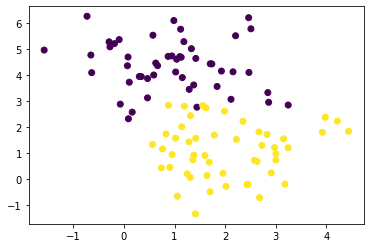

In [63]:
#display data
plt.scatter(X[:,0],X[:,1],c=y)
#plt.scatter(X[:, 0], X[:, 1], c=y)

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [75]:
from sklearn.linear_model import LogisticRegression
LogisticReg = LogisticRegression(C=1)
LogisticReg.fit(X_train, y_train)


LogisticRegression(C=1)

In [76]:
pred=LogisticReg.predict(X_test)
true = y_test
pd.DataFrame({"Prediction": pred, "Actual": y_test})

,Prediction,Actual
0,0,1
1,0,0
2,1,1
3,0,0
4,1,1
5,0,0
6,1,1
7,0,0
8,0,0
9,0,1


In [77]:
#find the accuracy
print(f"Training Score: {LogisticReg.score(X_train, y_train)}")
print(f"Testing Score: {LogisticReg.score(X_test, y_test)}")

Training Score: 0.9733333333333334
Testing Score: 0.84


In [97]:
#There is possible overfitting
train_scores =[]
test_scores=[]
c_values =[]

for i in range(200,10000):
    c= 1/i
    LogisticReg1 = LogisticRegression(C=c)
    LogisticReg1.fit(X_train, y_train)
    train_score = LogisticReg1.score(X_train, y_train)
    test_score = LogisticReg1.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    c_values.append(c)


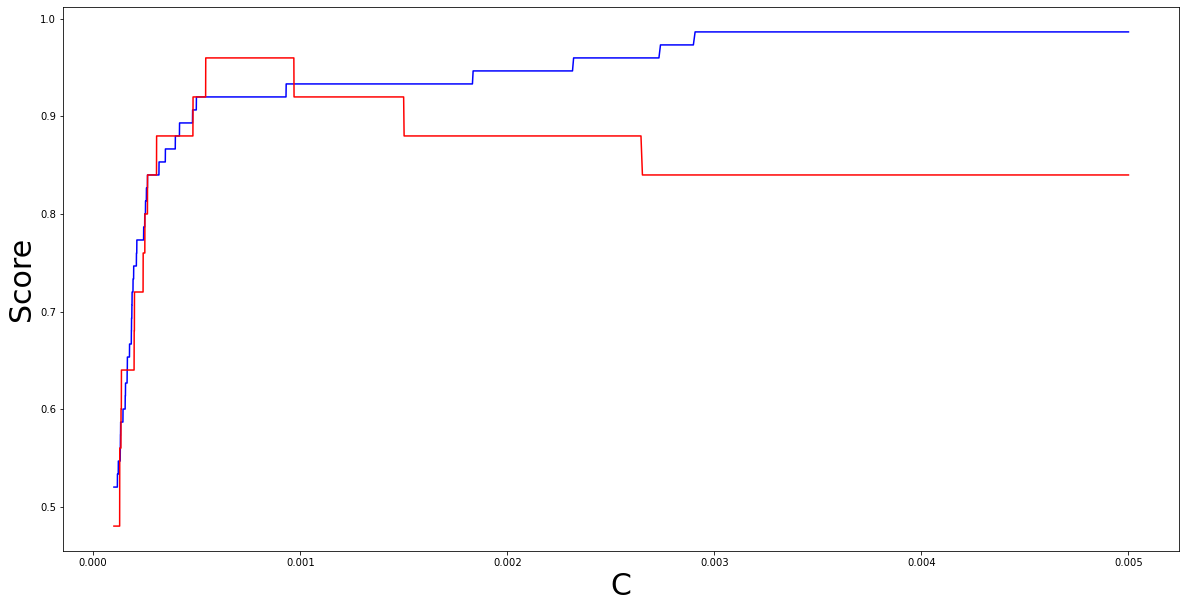

In [105]:
plt.figure(figsize=(20,10))
plt.xlabel('C',fontsize=30)
plt.ylabel('Score',fontsize=30)
plt.plot(c_values,train_scores, c='b')
plt.plot(c_values,test_scores,c='r')
